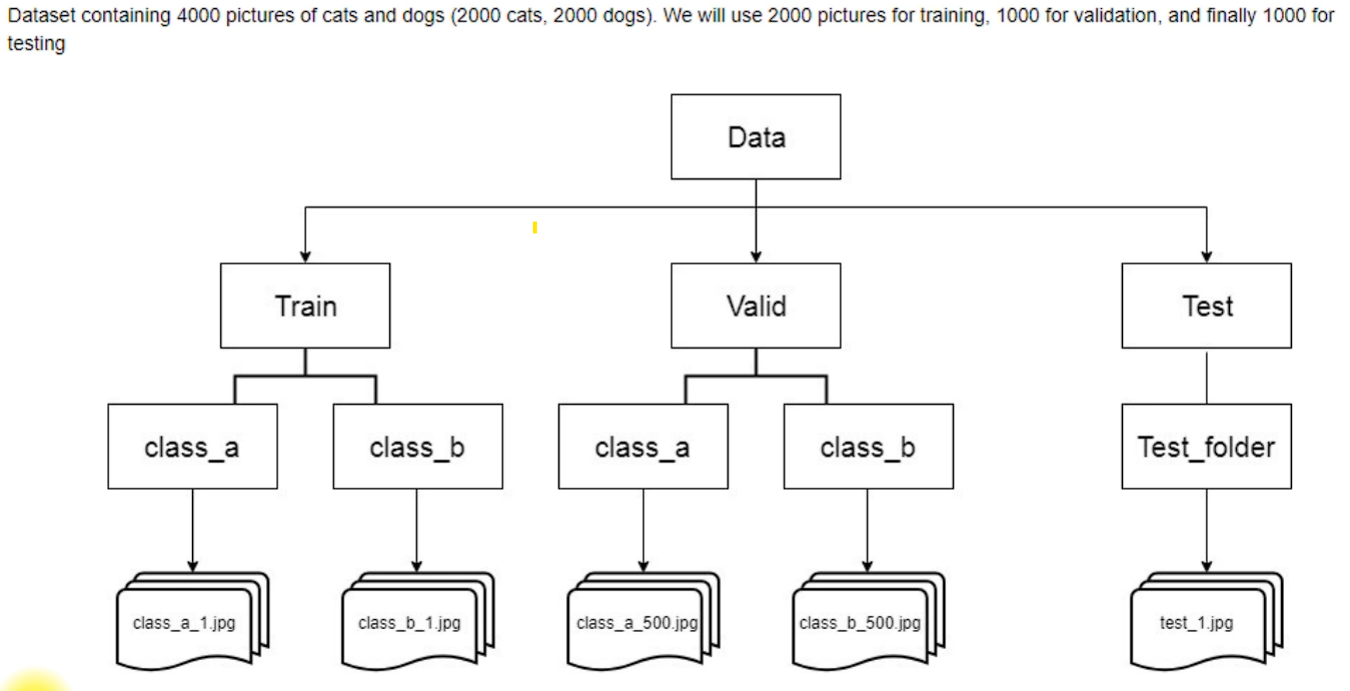

### Step :- 0 Import Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
train_dir      = 'Data/Cat_and_Dog/train/'
validation_dir = 'Data/Cat_and_Dog/validation/'
test_dir       = 'Data/Cat_and_Dog/test/'

### Step :- 1 Data Preprocessing
- Read the Image files
- Decode the JPEG content to RGB grids of pixels.
- Convert thses into floating point tensors
- Rescale the pixel values (between 0 and 255) to the [0,1] interval

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Link : https://keras.io/preprocessing/image/

In [8]:
# Image data augmentation for training and rescaling for testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from training directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Flow from validation directory
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

In [17]:
# Buliding CNN Model

model = Sequential([
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (150 , 150 , 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64 , kernel_size=(3,3) , activation ='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=128 , kernel_size=(3,3) , activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=128 , kernel_size=(3,3) , activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(512 , activation='relu'),
    layers.Dense(1 , activation='sigmoid')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [21]:
# Complie the Model

from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=1e-4),
              metrics=["acc"]
             )

In [23]:
# Train the model using the fit method
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # Number of batches to process per epoch
    epochs=10,            # Number of epochs to train the model
    validation_data=validation_generator,  # Validation data generator
    validation_steps=50   # Number of batches to process for validation
)

Epoch 1/10


100/100 [==============================] - 41s 393ms/step - loss: 0.6922 - acc: 0.5135 - val_loss: 0.6844 - val_acc: 0.6120
Epoch 2/10
100/100 [==============================] - 40s 396ms/step - loss: 0.6794 - acc: 0.5655 - val_loss: 0.6644 - val_acc: 0.6180
Epoch 3/10
100/100 [==============================] - 39s 391ms/step - loss: 0.6598 - acc: 0.6115 - val_loss: 0.6405 - val_acc: 0.6420
Epoch 4/10
100/100 [==============================] - 35s 346ms/step - loss: 0.6371 - acc: 0.6440 - val_loss: 0.6291 - val_acc: 0.6340
Epoch 5/10
100/100 [==============================] - 42s 424ms/step - loss: 0.6040 - acc: 0.6820 - val_loss: 0.6314 - val_acc: 0.6330
Epoch 6/10
100/100 [==============================] - 52s 519ms/step - loss: 0.5782 - acc: 0.6870 - val_loss: 0.6182 - val_acc: 0.6530
Epoch 7/10
100/100 [==============================] - 47s 468ms/step - loss: 0.5540 - acc: 0.7160 - val_loss: 0.6041 - val_acc: 0.6570
Epoch 8/10
100/100 [==============================] -

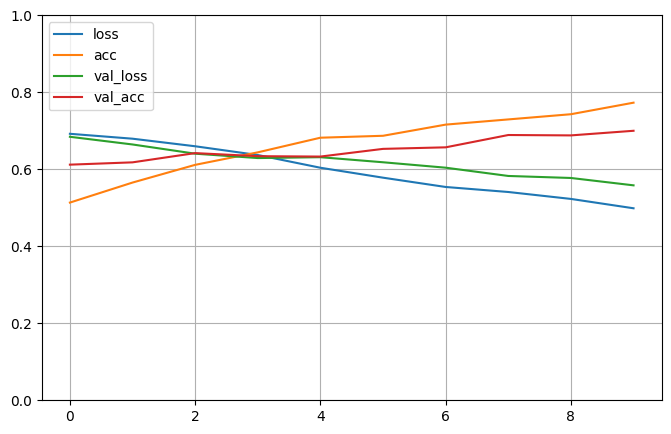

In [25]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()